In [1]:
import pandas as pd

## Loading Active Reports

In [2]:
active_reports = pd.read_csv("datasets/active_reports.csv")

In [3]:
active_reports.shape

(7101, 50)

## Loaging Lightning PageView

In [4]:
pageview_logs = pd.read_csv("data/Salesforce/Salesforce/ELF/LightningPageView/2022-06-05_LightningPageView.csv", 
                            low_memory=False)

In [5]:
interest_columns = ['PAGE_URL', 'DURATION', 'EFFECTIVE_PAGE_TIME', 'USER_TYPE']

In [6]:
pageview_ept = pageview_logs[interest_columns]

In [7]:
pageview_ept.shape

(751610, 4)

### Getting Report_Id by Page_Url

In [8]:
# Remove missing values in any of the following columns 
pageview_ept = pageview_ept.dropna(subset = ['PAGE_URL'])

In [9]:
pageview_ept.shape

(749318, 4)

In [10]:
run_report_api_resource = "/lightning/r/"

def get_report_info_from_endpoint(page_url):
    if not(pd.isnull(page_url)) == True: 
        if page_url.startswith(run_report_api_resource):
            uri = page_url.split(run_report_api_resource)
            if len(uri) >= 2:
                report_type, report_id_derived = uri[1].split("/")[:2]
                return report_type, report_id_derived

In [11]:
pageview_ept['REPORT_INFO_DERIVED'] = pageview_ept.PAGE_URL.apply(get_report_info_from_endpoint)

In [12]:
pageview_ept['REPORT_TYPE_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[0]

In [13]:
pageview_ept['REPORT_ID_DERIVED'] = pageview_ept.REPORT_INFO_DERIVED.str[1]

In [14]:
# Remove missing values in any of the following columns 
pageview_ept = pageview_ept.dropna(subset=['REPORT_ID_DERIVED'])

Applying problematic filters

In [15]:
pageview_ept = pageview_ept[pageview_ept.EFFECTIVE_PAGE_TIME.isna()]

In [16]:
pageview_ept = pageview_ept[pageview_ept.DURATION > 60000] # 60s -> 60000ms

In [17]:
pageview_ept.head()

,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,USER_TYPE,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED,REPORT_ID_DERIVED
890,/lightning/r/Call_Transcript__c/a7Z2R000002Q33...,166655.0,NaN,Standard,"(Call_Transcript__c, a7Z2R000002Q33NUAS)",Call_Transcript__c,a7Z2R000002Q33NUAS
1843,/lightning/r/Report/00O0b000006iNwdEAE/view,129212.0,NaN,Standard,"(Report, 00O0b000006iNwdEAE)",Report,00O0b000006iNwdEAE
2363,/lightning/r/WorkOrder/0WO6P00000273YqWAI/view...,70994.0,NaN,Standard,"(WorkOrder, 0WO6P00000273YqWAI)",WorkOrder,0WO6P00000273YqWAI
3254,/lightning/r/Contact/0036P000004Rl3nQAC/view?w...,68522.0,NaN,Standard,"(Contact, 0036P000004Rl3nQAC)",Contact,0036P000004Rl3nQAC
4340,/lightning/r/Task/00T6P00000HboKyUAJ/view?ws=%...,92596.0,NaN,Standard,"(Task, 00T6P00000HboKyUAJ)",Task,00T6P00000HboKyUAJ


## Merging to get active and problematic reports

In [18]:
active_and_problematic_reports  = pd.merge(left=active_reports, right=pageview_ept, 
                                           left_on="Id", right_on="REPORT_ID_DERIVED")

In [19]:
active_and_problematic_reports.shape

(141455, 57)

In [20]:
active_and_problematic_reports.head()

,CreatedById,CreatedDate,Description,DeveloperName,FolderName,Format,Id,IsDeleted,LastModifiedById,LastModifiedDate,...,REPORT_ID_DERIVED_x,ORIGIN,IsActive,PAGE_URL,DURATION,EFFECTIVE_PAGE_TIME,USER_TYPE_y,REPORT_INFO_DERIVED,REPORT_TYPE_DERIVED,REPORT_ID_DERIVED_y
0,0050b000004QT9yAAG,2018-06-30T05:07:10.000Z,NaN,MyCases_with_Tasks,DELL Service Agent Reports,Tabular,00O0b000004kTazEAE,False,0050b000005Jf0WAAS,2022-05-30T22:38:26.000,...,00O0b000004kTazEAE,ReportRunFromLightning,True,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,60051.0,NaN,Standard,"(Report, 00O0b000004kTazEAE)",Report,00O0b000004kTazEAE
1,0050b000004QT9yAAG,2018-06-30T05:07:10.000Z,NaN,MyCases_with_Tasks,DELL Service Agent Reports,Tabular,00O0b000004kTazEAE,False,0050b000005Jf0WAAS,2022-05-30T22:38:26.000,...,00O0b000004kTazEAE,ReportRunFromLightning,True,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,61267.0,NaN,Standard,"(Report, 00O0b000004kTazEAE)",Report,00O0b000004kTazEAE
2,0050b000004QT9yAAG,2018-06-30T05:07:10.000Z,NaN,MyCases_with_Tasks,DELL Service Agent Reports,Tabular,00O0b000004kTazEAE,False,0050b000005Jf0WAAS,2022-05-30T22:38:26.000,...,00O0b000004kTazEAE,ReportRunFromLightning,True,/lightning/r/Report/00O0b000004kTazEAE/view,333616.0,NaN,Standard,"(Report, 00O0b000004kTazEAE)",Report,00O0b000004kTazEAE
3,0050b000004QT9yAAG,2018-06-30T05:07:10.000Z,NaN,MyCases_with_Tasks,DELL Service Agent Reports,Tabular,00O0b000004kTazEAE,False,0050b000005Jf0WAAS,2022-05-30T22:38:26.000,...,00O0b000004kTazEAE,ReportRunFromLightning,True,/lightning/r/Report/00O0b000004kTazEAE/view,112760.0,NaN,Standard,"(Report, 00O0b000004kTazEAE)",Report,00O0b000004kTazEAE
4,0050b000004QT9yAAG,2018-06-30T05:07:10.000Z,NaN,MyCases_with_Tasks,DELL Service Agent Reports,Tabular,00O0b000004kTazEAE,False,0050b000005Jf0WAAS,2022-05-30T22:38:26.000,...,00O0b000004kTazEAE,ReportRunFromLightning,True,/lightning/r/Report/00O0b000004kTazEAE/view?qu...,62413.0,NaN,Standard,"(Report, 00O0b000004kTazEAE)",Report,00O0b000004kTazEAE


Removing useless columns

In [21]:
list(active_and_problematic_reports.columns)

['CreatedById',
 'CreatedDate',
 'Description',
 'DeveloperName',
 'FolderName',
 'Format',
 'Id',
 'IsDeleted',
 'LastModifiedById',
 'LastModifiedDate',
 'LastReferencedDate',
 'LastRunDate',
 'LastViewedDate',
 'Name',
 'NamespacePrefix',
 'OwnerId',
 'ReportTypeApiName',
 'SystemModstamp',
 'EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'RUN_TIME',
 'CPU_TIME',
 'URI',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE_x',
 'REQUEST_STATUS',
 'DB_TOTAL_TIME',
 'ENTITY_NAME',
 'DISPLAY_TYPE',
 'RENDERING_TYPE',
 'REPORT_ID',
 'ROW_COUNT',
 'NUMBER_EXCEPTION_FILTERS',
 'NUMBER_COLUMNS',
 'AVERAGE_ROW_SIZE',
 'SORT',
 'DB_BLOCKS',
 'DB_CPU_TIME',
 'NUMBER_BUCKETS',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'URI_ID_DERIVED',
 'REPORT_ID_DERIVED_x',
 'ORIGIN',
 'IsActive',
 'PAGE_URL',
 'DURATION',
 'EFFECTIVE_PAGE_TIME',
 'USER_TYPE_y',
 'REPORT_INFO_DERIVED',
 'REPORT_TYPE_DERIVED',
 'REPORT_ID_DERIVED_y']

In [22]:
active_and_problematic_reports = active_and_problematic_reports.drop(columns=[
    'CreatedById', 'CreatedDate', 'Description', 'DeveloperName', 'FolderName', 
    'Format', 'Id', 'IsDeleted', 
    'LastModifiedById', 'LastModifiedDate', 'LastReferencedDate', 'LastRunDate', 'LastViewedDate',
    'NamespacePrefix', 'OwnerId', 'ReportTypeApiName', 
    'SystemModstamp', 'EVENT_TYPE', 'TIMESTAMP', 
    'REQUEST_ID', 'ORGANIZATION_ID', 'USER_ID',
    'RUN_TIME', 'CPU_TIME', 'URI', 
    'SESSION_KEY', 'LOGIN_KEY',
    'DB_TOTAL_TIME', 'ENTITY_NAME', 
    'DISPLAY_TYPE', 'RENDERING_TYPE', 
    'REPORT_ID', 'ROW_COUNT', 
    'NUMBER_EXCEPTION_FILTERS', 'NUMBER_COLUMNS', 'AVERAGE_ROW_SIZE', 'SORT', 
    'DB_BLOCKS', 'DB_CPU_TIME', 
    'NUMBER_BUCKETS', 'TIMESTAMP_DERIVED', 'USER_ID_DERIVED', 
    'CLIENT_IP', 'URI_ID_DERIVED',
    'IsActive',
    'PAGE_URL', 'DURATION', 'EFFECTIVE_PAGE_TIME', 
    'REPORT_INFO_DERIVED', 'REPORT_TYPE_DERIVED',
    'USER_TYPE_y', 'REPORT_ID_DERIVED_y'
])

In [23]:
active_and_problematic_reports.head()

,Name,USER_TYPE_x,REQUEST_STATUS,REPORT_ID_DERIVED_x,ORIGIN
0,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
1,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
2,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
3,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
4,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning


Renaming ***USER_TYPE_x*** and ***REPORT_ID_DERIVED_x*** columns

In [24]:
active_and_problematic_reports.rename(columns={'USER_TYPE_x': 'USER_TYPE'}, inplace = True)

In [25]:
active_and_problematic_reports.rename(columns={'REPORT_ID_DERIVED_x': 'REPORT_ID_DERIVED'}, inplace = True)

In [26]:
active_and_problematic_reports.head()

,Name,USER_TYPE,REQUEST_STATUS,REPORT_ID_DERIVED,ORIGIN
0,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
1,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
2,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
3,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning
4,My Cases and Tasks,Standard,NaN,00O0b000004kTazEAE,ReportRunFromLightning


Checking ***Origin*** and ***Request_Status***

In [27]:
active_and_problematic_reports['ORIGIN'].unique()

array(['ReportRunFromLightning'], dtype=object)

In [28]:
active_and_problematic_reports['REQUEST_STATUS'].unique()

array([nan])

In [29]:
# active_and_problematic_reports = active_and_problematic_reports[
#     active_and_problematic_reports.REQUEST_STATUS == "Success"]

### Alalyzing ***User_Type***

In [30]:
active_and_problematic_reports['USER_TYPE'].unique()

array(['Standard'], dtype=object)

Data don't have enough information/diversity to analyze

### Analyzing ***Name***

In [31]:
active_and_problematic_reports_group = active_and_problematic_reports.groupby(['Name']).agg({'ORIGIN': 'count'})

In [32]:
active_and_problematic_reports_group.reset_index(inplace=True)

In [33]:
active_and_problematic_reports_group.rename(columns={'ORIGIN': 'Count'}, inplace = True)

In [34]:
active_and_problematic_reports_group

,Name,Count
0,Agent Timesheet_Omni,915
1,Byrd Manual Time Tracking - FW Trending,2
2,GAM Backlog,16
3,My Cases and Tasks,140425
4,NCC Monitor _ RCM,97


In [36]:
list_name = active_and_problematic_reports_group['Name'].tolist()
list_count = active_and_problematic_reports_group['Count'].tolist()
print(list_name, list_count)

['Agent Timesheet_Omni', 'Byrd Manual Time Tracking - FW Trending', 'GAM Backlog', 'My Cases and Tasks', 'NCC Monitor _ RCM'] [915, 2, 16, 140425, 97]


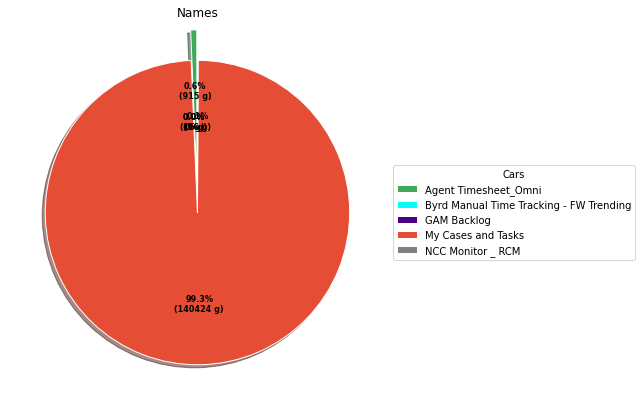

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
  
explode = (0.2, 0.0, 0.0, 0.0, 0.0) 
colors = ( "#3FAA59", "cyan", "indigo", 
          "#E54E35", "grey") 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(list_count,  
                                  autopct = lambda pct: func(pct, list_count), 
                                  explode = explode,  
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
ax.legend(wedges, list_name, 
          title ="Cars", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Names") 
plt.show() 